# Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

Data We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Variable : Description

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted.

My approch: after reading and analyzing data it is found that:

Item_Fat_Content has catagories ['Low Fat', 'reg', 'Regular', 'LF', 'low fat'] Corrected the misspeled catagories and converted them to
'LF', 'low fat' => 'Low Fat' 'reg' => 'Regular'

There are some missing values in Outlet_size and Item_Weight for Item_Weight missing values are filled by mean of the column and Outlet_size missing values are filled by mode of the column i.e 'Medium'

created new column called num_years num_years indicate that how old the outlet is.

then applied different models for prediction LinearRegression , SVM, RandomForestRegressor

In [52]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [81]:
import pandas as pd
df1=pd.read_csv("big_mart_train.csv")
df2=pd.read_csv("big_mart_test.csv")

In [82]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [83]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EDA

In [84]:
df1.shape

(8523, 12)

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [86]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
df1['Item_Weight'].mean()

12.857645184136183

In [88]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(), inplace=True)

In [89]:
df1['Outlet_Size'].mode()


0    Medium
dtype: object

In [90]:
mode_of_Outlet_size = df1.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [92]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [93]:
miss_values = df1['Outlet_Size'].isnull()   

In [94]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [95]:
df1.loc[miss_values, 'Outlet_Size'] = df1.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [96]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [97]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [98]:
import seaborn as sns
sns.set()

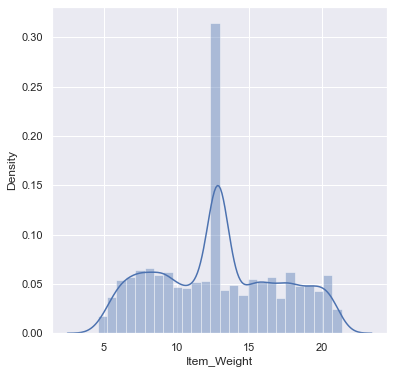

In [99]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_Weight'])
plt.show()

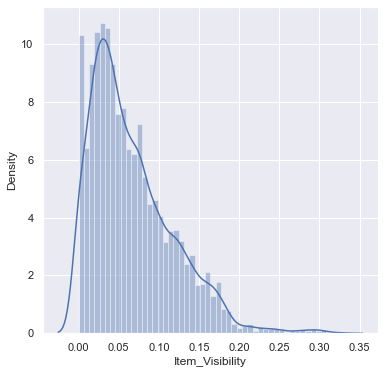

In [100]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_Visibility'])
plt.show()

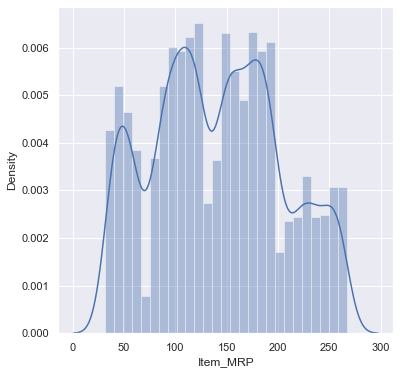

In [101]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_MRP'])
plt.show()


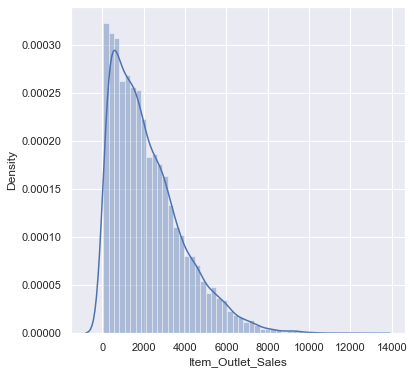

In [102]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_Outlet_Sales'])
plt.show()

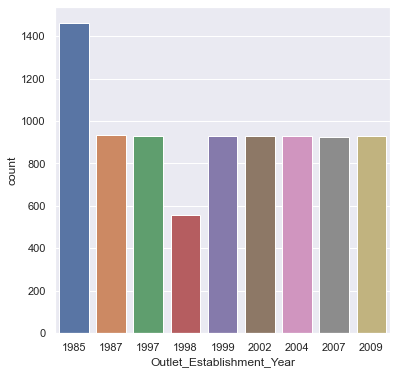

In [103]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df1)
plt.show()

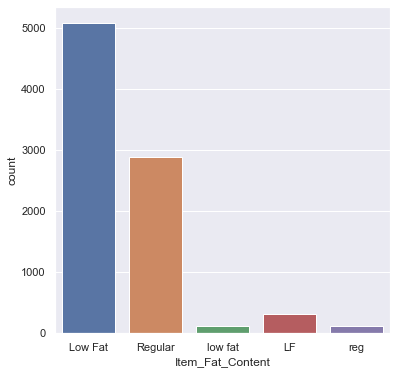

In [104]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df1)
plt.show()

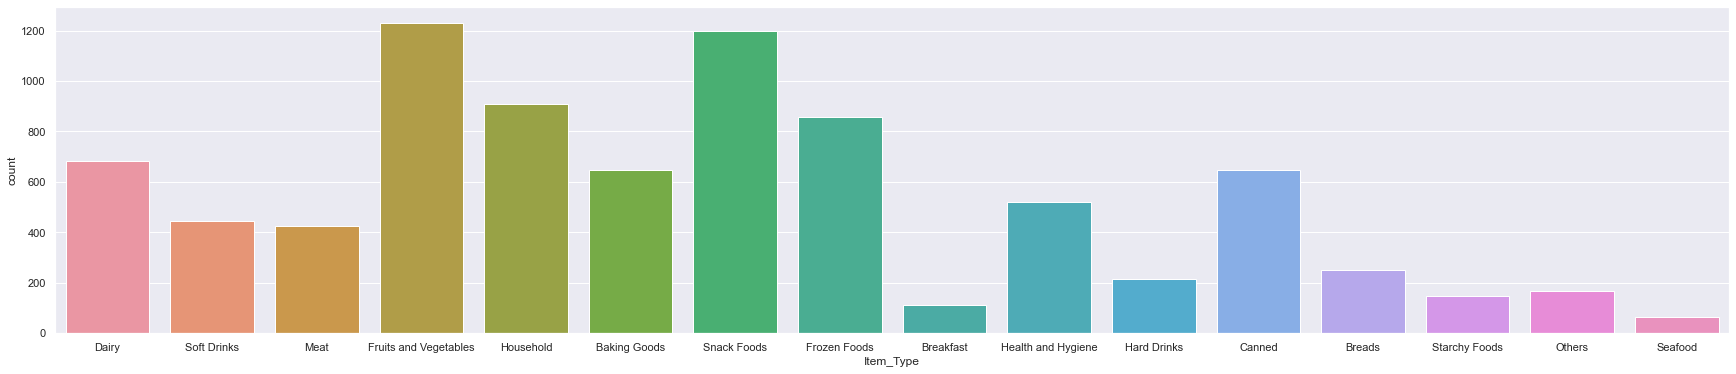

In [105]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df1)
plt.show()


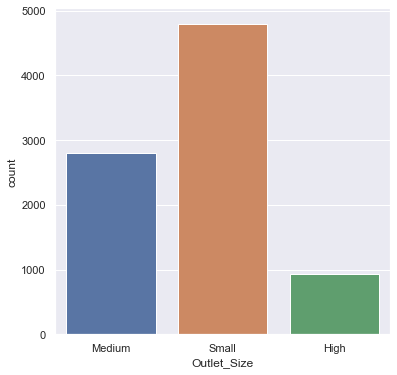

In [106]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df1)
plt.show()

In [107]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [108]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [109]:
df1.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [110]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [111]:
encoder = LabelEncoder()

In [112]:
df1['Item_Identifier'] = encoder.fit_transform(df1['Item_Identifier'])

df1['Item_Fat_Content'] = encoder.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type'] = encoder.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier'] = encoder.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size'] = encoder.fit_transform(df1['Outlet_Size'])

df1['Outlet_Location_Type'] = encoder.fit_transform(df1['Outlet_Location_Type'])

df1['Outlet_Type'] = encoder.fit_transform(df1['Outlet_Type'])


In [113]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Correlation:


In [114]:
df1.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001229,-0.014105,-0.001262,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


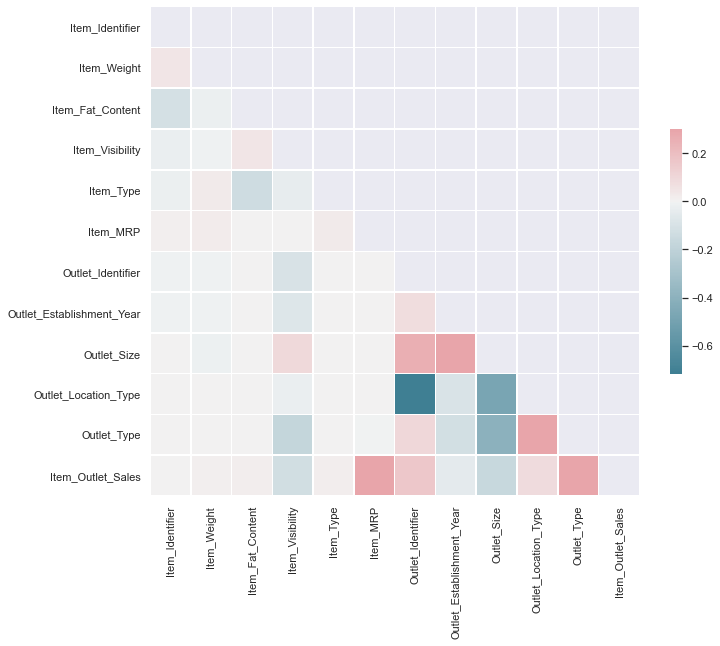

In [115]:
import numpy as np
correlations = df1.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

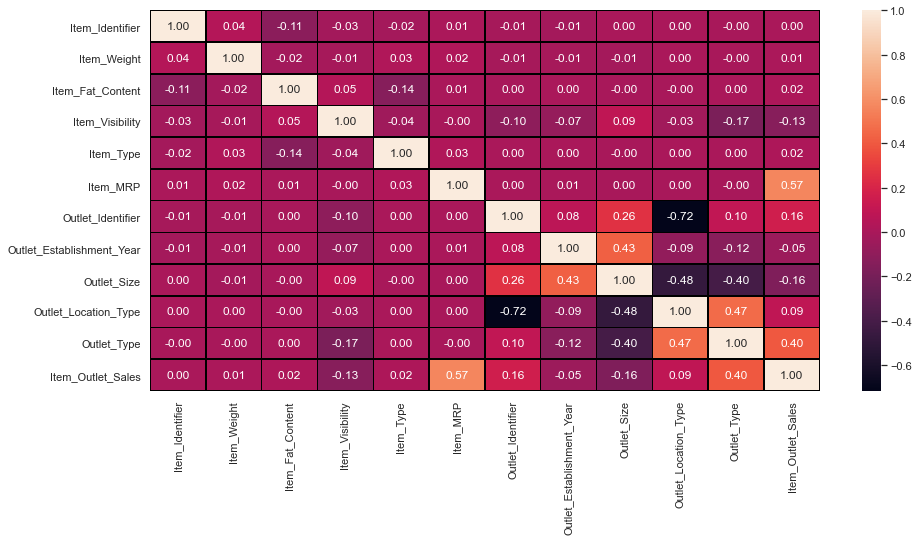

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

From this we can see that almost all the values are not corelated to each other.

# Describe Heatmap

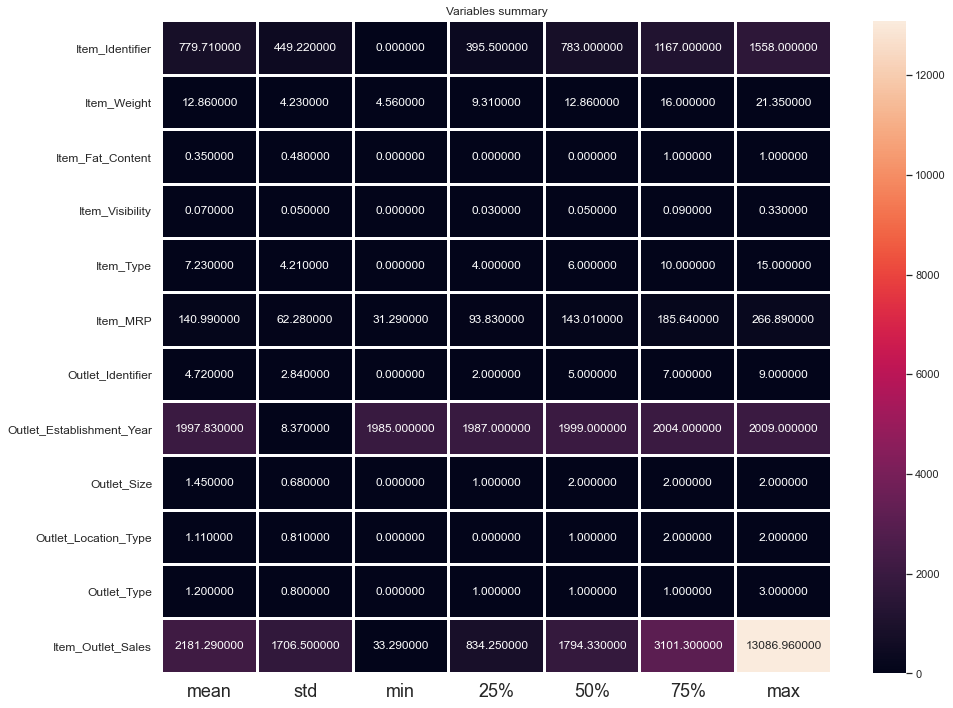

In [117]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


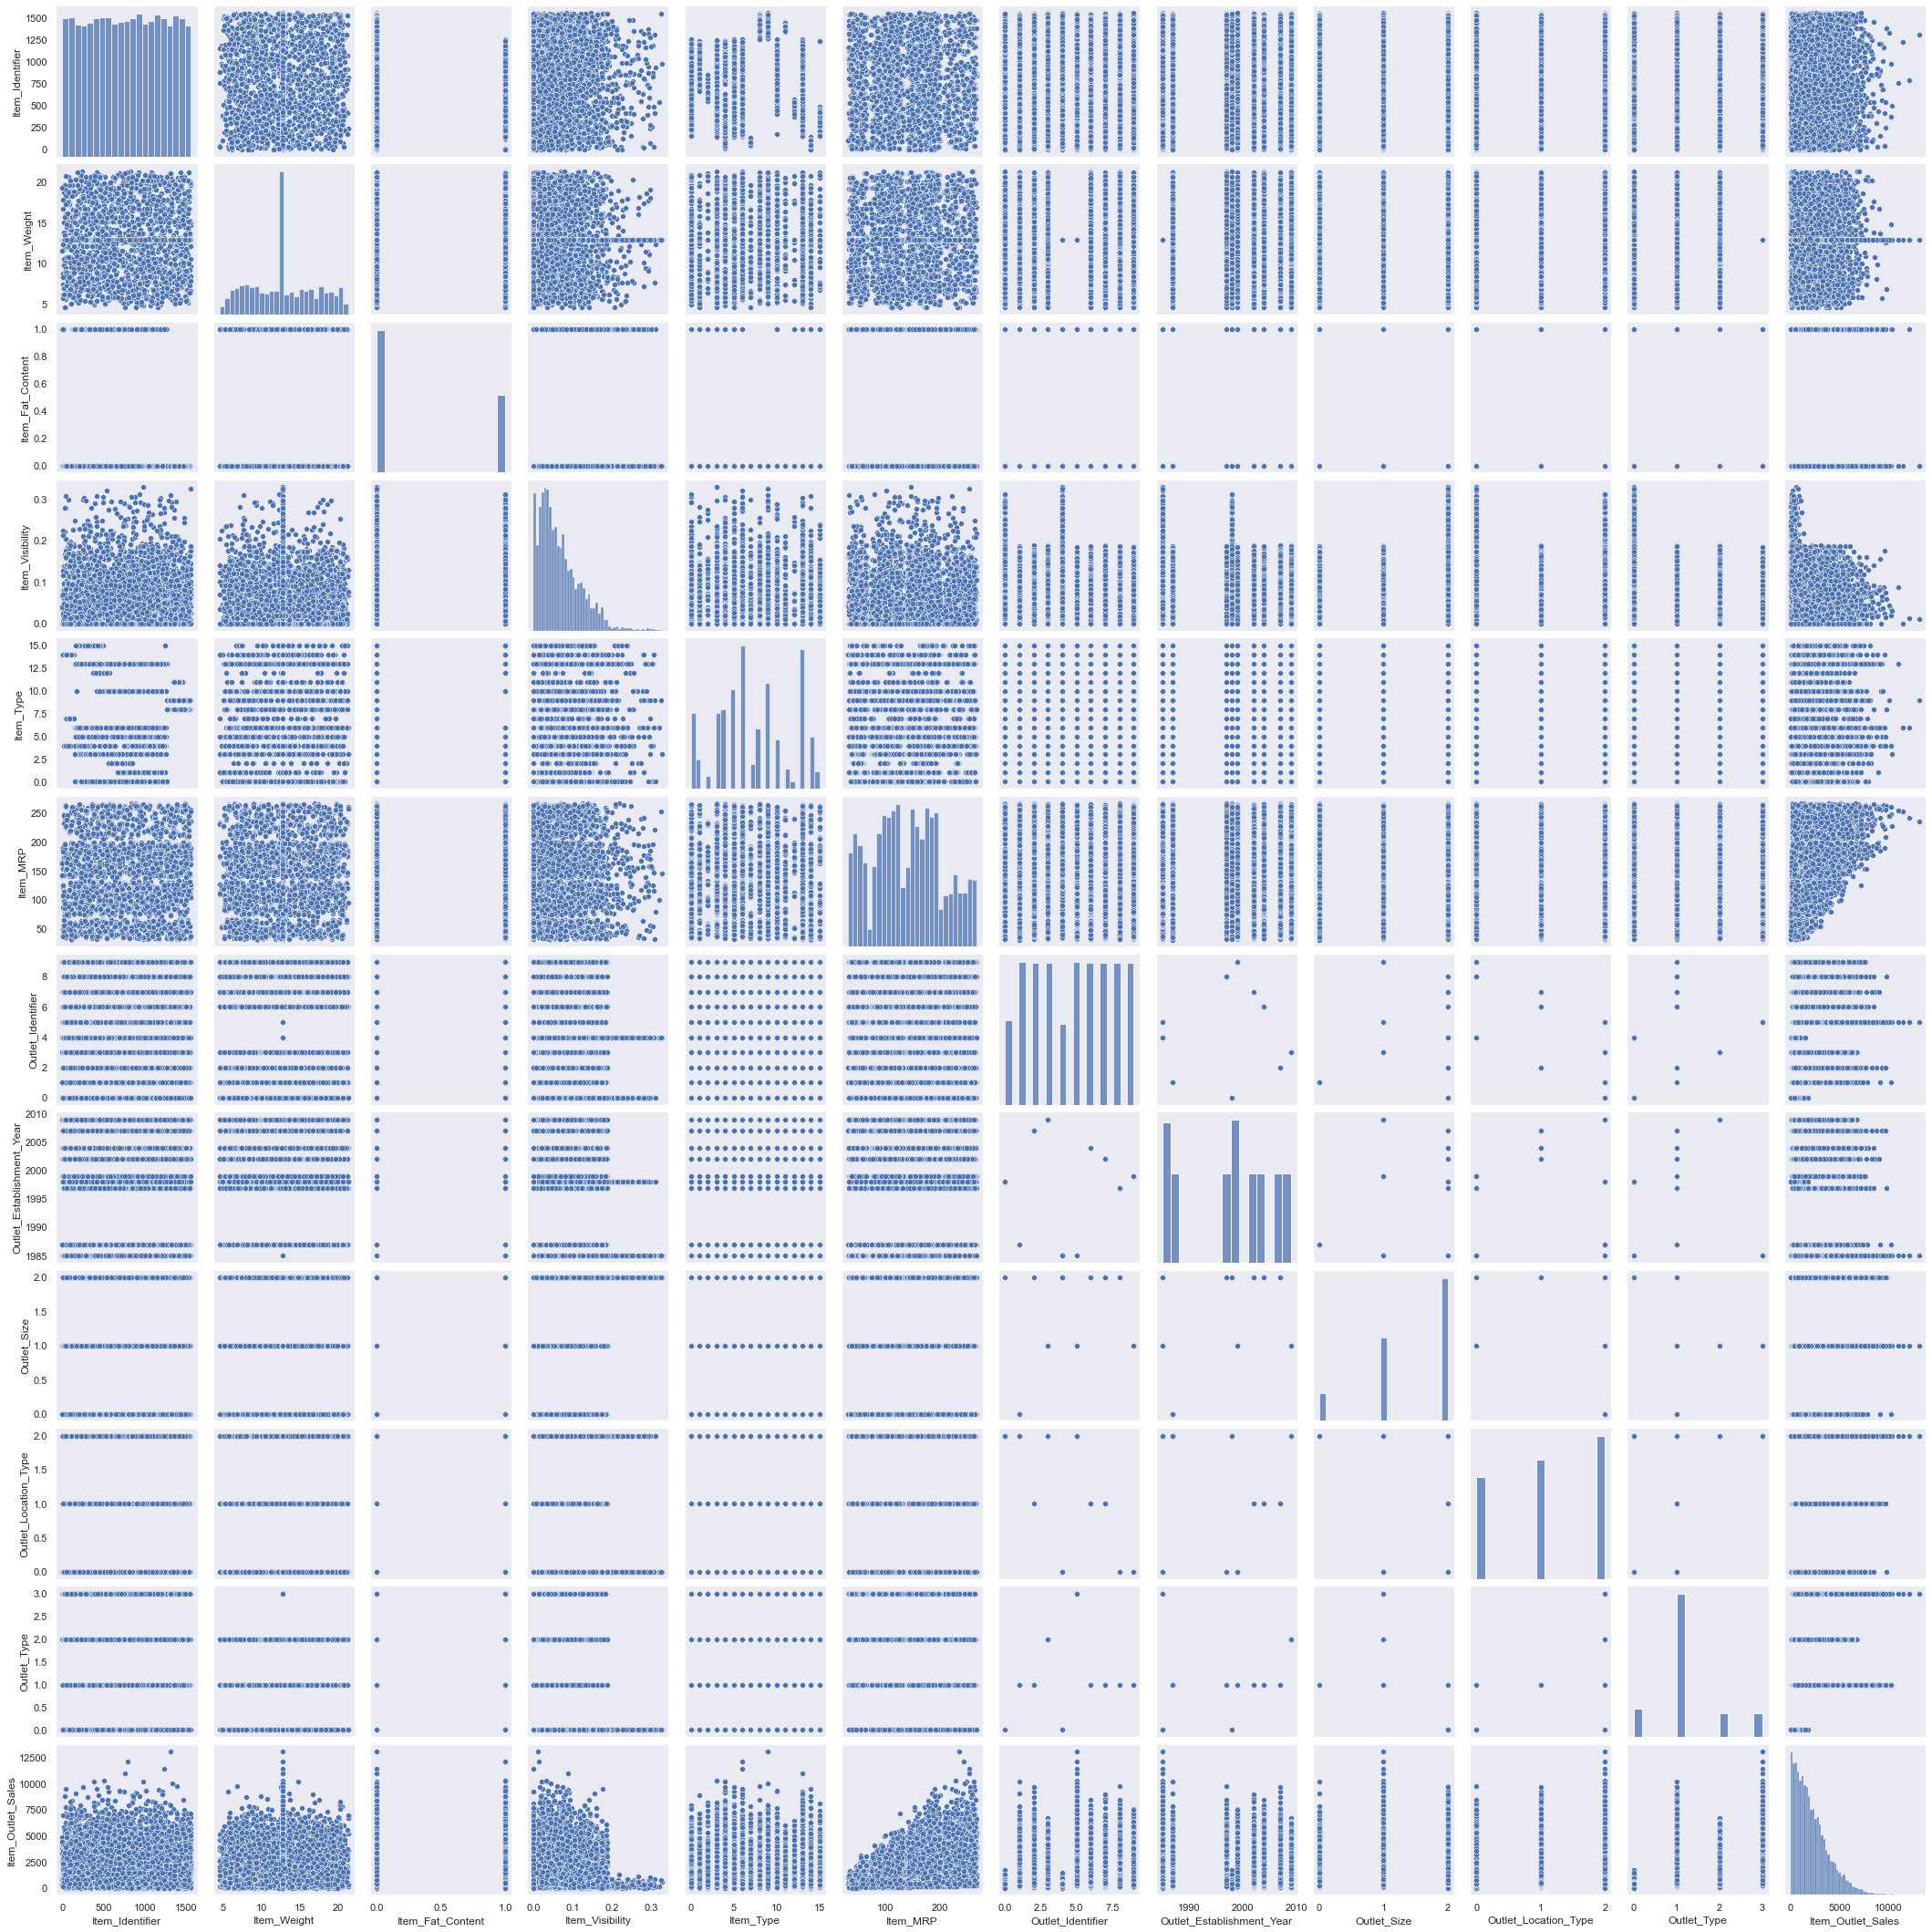

In [118]:
# let us visualize using pairplot
sns.pairplot(df1)

We have handled all our features and now we can conactenate all the standardized features in a new dataframe.

In [69]:
#df1.drop(columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'],axis=1,inplace=True)

In [119]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# Now use subplot and displot to check data are normalised or not.

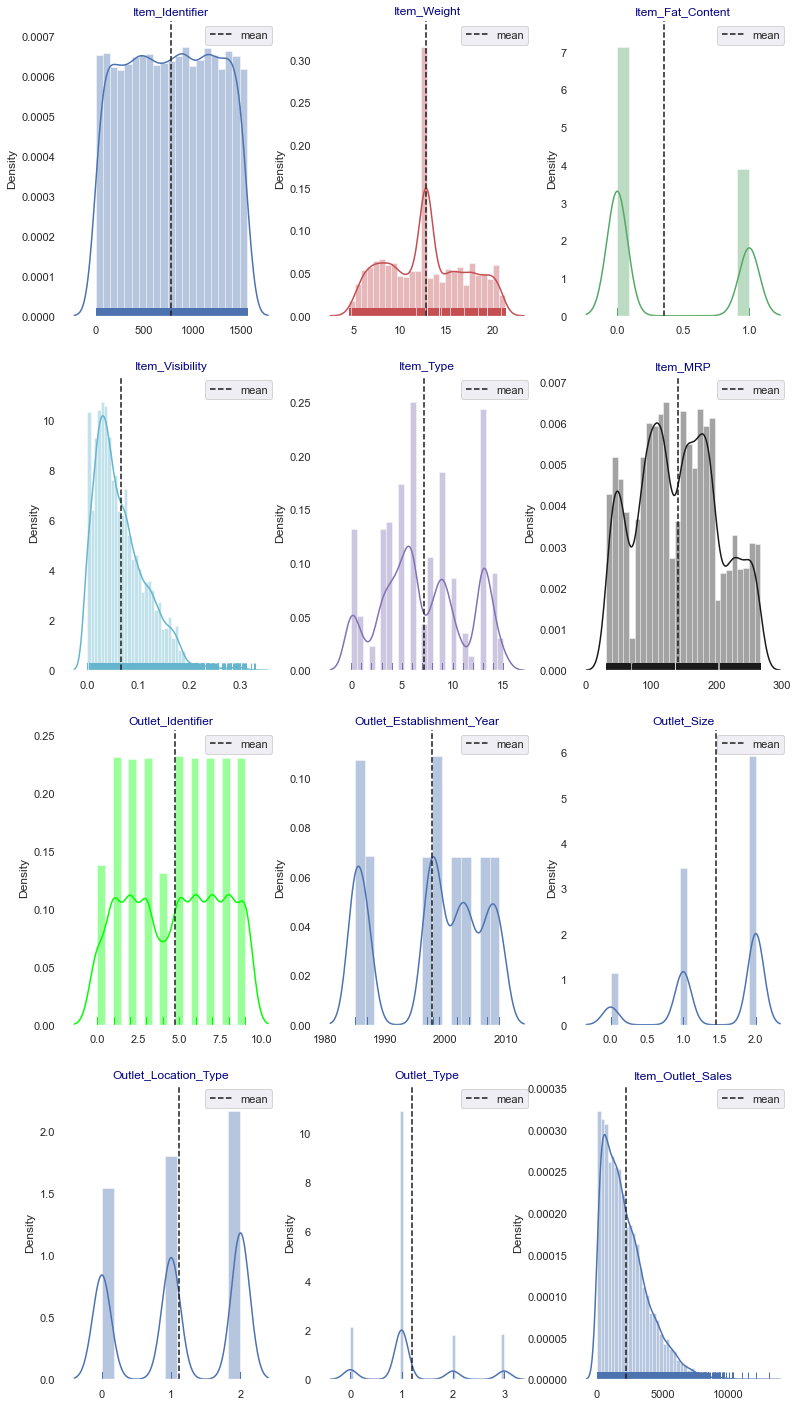

In [123]:
import itertools

cols = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(df1[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df1[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observation:

As building blocks are out of the normal distribution curve;hence outliers are present and we do data cleaning as well.

array([[<AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>],
       [<AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>],
       [<AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

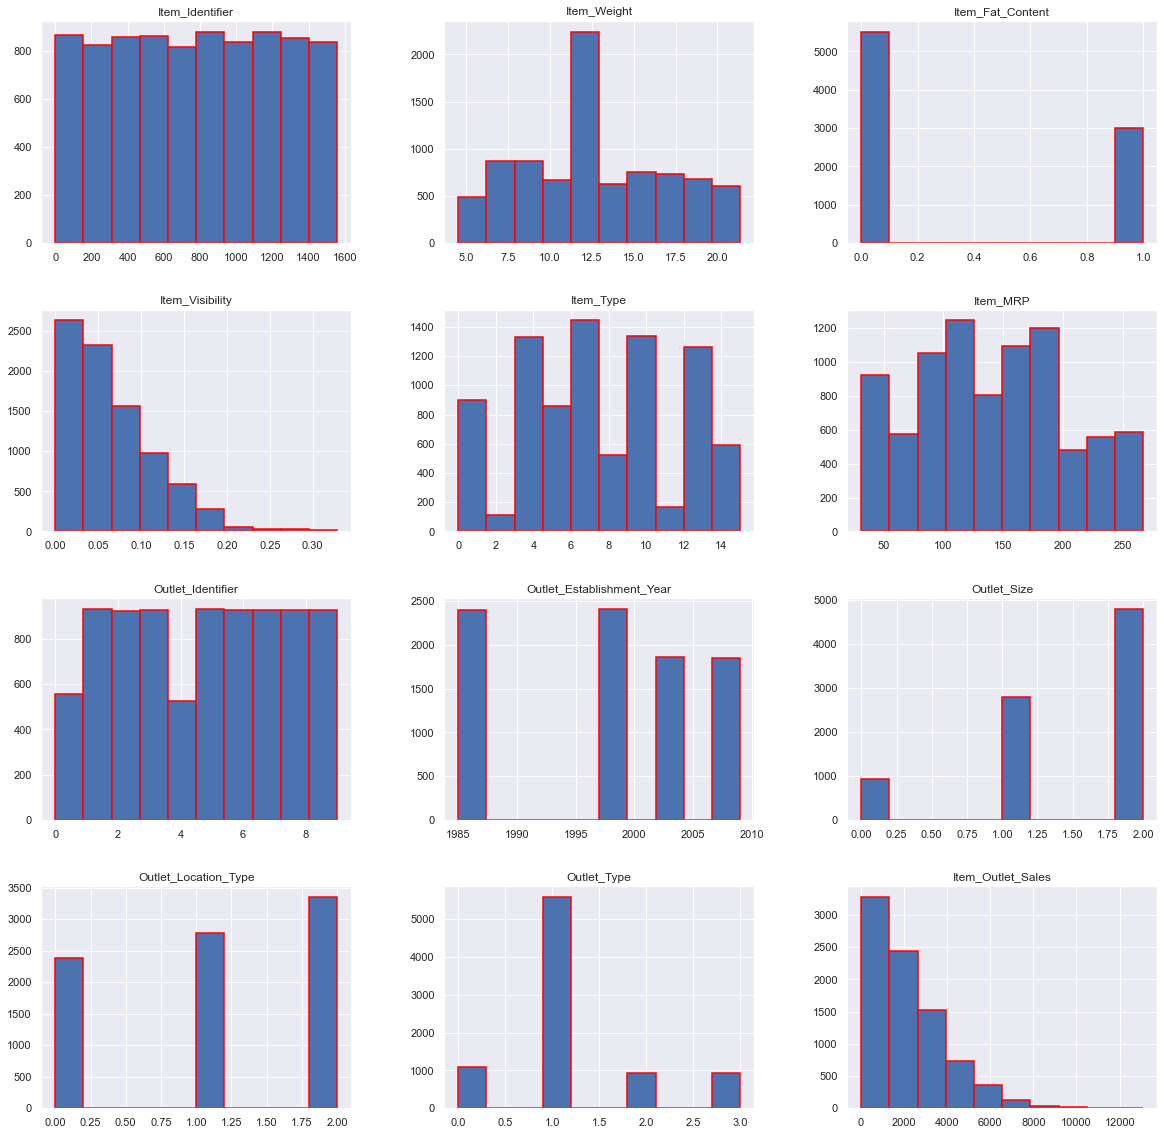

In [124]:
df1.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

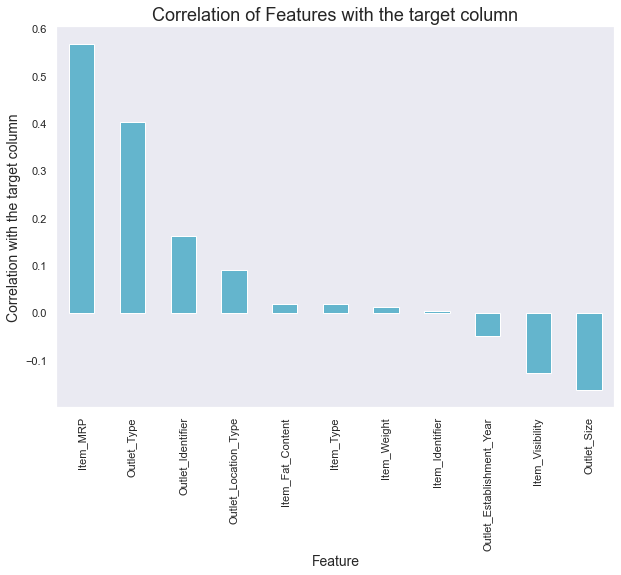

In [127]:
plt.figure(figsize=(10,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [129]:
df1.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.861866
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

some columns having skewness



# Detecting outliers

<AxesSubplot:>

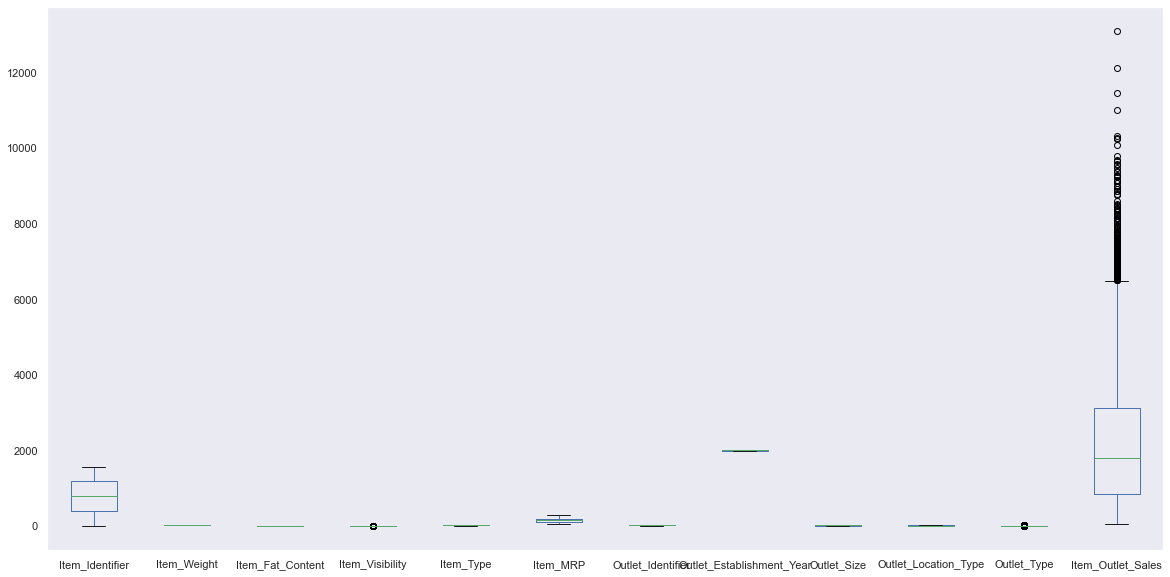

In [132]:
df1.plot.box(figsize=(20,10))

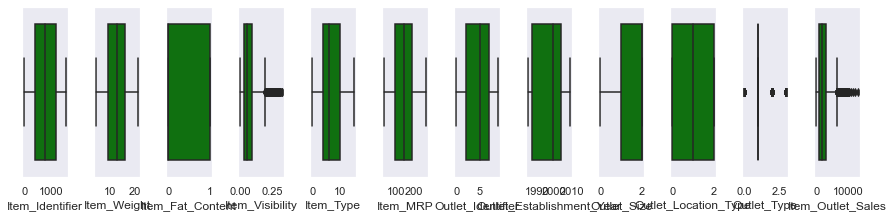

In [133]:
collist=df1.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df1[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in some columns. Fare having maximum no of outliers.

# Check the percentage of data falls under outliers:

In [135]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [137]:
df_new=df1[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [139]:
percentage_loss=((8532-8338)/8532)*100
print(percentage_loss)

2.273792780121894


The data loss is below 10 percentile so we can proceed futher data cleaning.

In [140]:
df_new.shape

(8338, 12)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [142]:
x = df_new.drop(columns='Item_Outlet_Sales', axis=1)
y = df_new['Item_Outlet_Sales']

In [143]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [144]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

# Removing skewness by transforming data.¶


In [145]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.87245492,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.87245492,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.87245492,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  0.85522175,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.87245492,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  0.85522175,
        -1.37581641, -0.13467763]])

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.87245492,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.87245492,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.87245492,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  0.85522175,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.87245492,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  0.85522175,
        -1.37581641, -0.13467763]])

# Since the column has continouse data type we will use Linear Regression model.¶
Regressor Model Building:
Linear Regression:

In [147]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [148]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 439  The model performs very well
At random_state:- 439
Training r2_score is:- 51.35949806047346
Testing r2_score is:- 51.35866286036423


In [149]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=439)

In [150]:


lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.5135866286036422

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

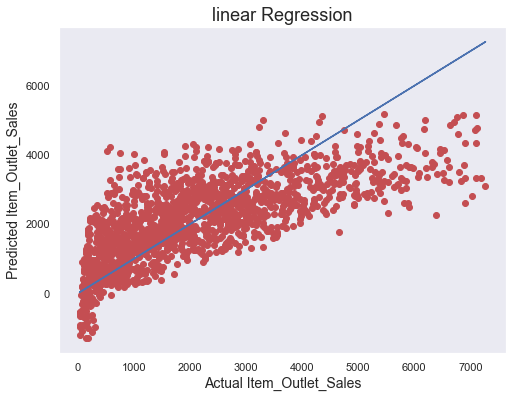

In [197]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

# 1. Lasso

In [156]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [157]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 51.13426446606473
R2_score is :- 51.37149348416719


At cv:- 3
Cross validation score is:- 51.179395823616645
R2_score is :- 51.37149348416719


At cv:- 4
Cross validation score is:- 51.12329153871625
R2_score is :- 51.37149348416719


At cv:- 5
Cross validation score is:- 51.18862709807578
R2_score is :- 51.37149348416719


At cv:- 6
Cross validation score is:- 51.18417931931067
R2_score is :- 51.37149348416719


At cv:- 7
Cross validation score is:- 51.22838759286107
R2_score is :- 51.37149348416719


At cv:- 8
Cross validation score is:- 51.18968499193966
R2_score is :- 51.37149348416719


At cv:- 9
Cross validation score is:- 51.18469366645114
R2_score is :- 51.37149348416719




In [158]:
print("At cv:-",7)
print("Cross validation score is:-",51.22 )
print("R2_score is :-",51.37)

At cv:- 7
Cross validation score is:- 51.22
R2_score is :- 51.37


In [159]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [160]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 844.1905147523559
Mean Squared Error: 1209460.015331258
Root Mean Square Error: 1099.7545250333176


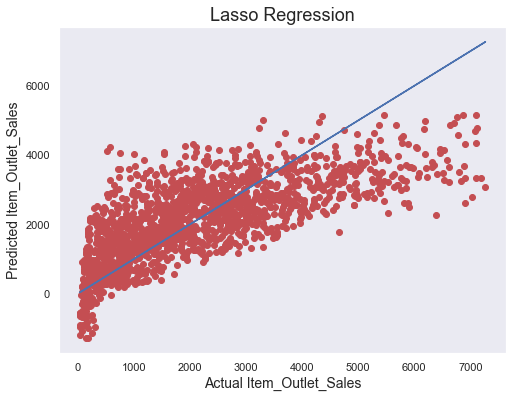

In [196]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [163]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [164]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 51.361607281131796
Cross Val Score: 51.12086377723129
At cv:- 3
R2 Score: 51.361607281131796
Cross Val Score: 51.17157273924359
At cv:- 4
R2 Score: 51.361607281131796
Cross Val Score: 51.11251909186323
At cv:- 5
R2 Score: 51.361607281131796
Cross Val Score: 51.183607245038466
At cv:- 6
R2 Score: 51.361607281131796
Cross Val Score: 51.17594167721408
At cv:- 7
R2 Score: 51.361607281131796
Cross Val Score: 51.22282597725242
At cv:- 8
R2 Score: 51.361607281131796
Cross Val Score: 51.182436243325924
At cv:- 9
R2 Score: 51.361607281131796
Cross Val Score: 51.17868105616851


In [165]:
print("At cv:-",8)
print("Cross validation score is:-",51.18 )
print("R2_score is :-",51.36)

At cv:- 8
Cross validation score is:- 51.18
R2_score is :- 51.36


In [166]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 844.2724400508966
Mean Squared Error: 1209705.8992403364
Root Mean Square Error: 1099.8663097123833


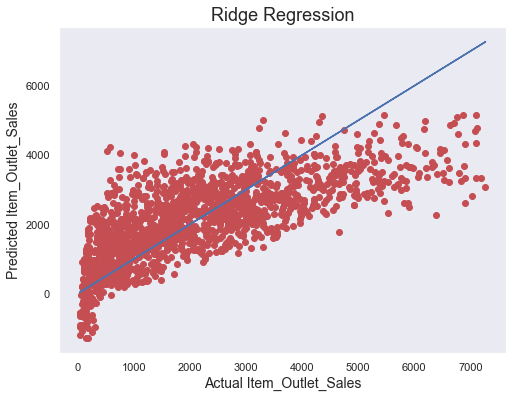

In [195]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

Decision Tree Regressor

In [168]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt', 'splitter': 'best'}


In [169]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_features= 'sqrt')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 17.15654500505568
Cross Val Score: 12.785908840897559
At cv:- 3
R2 Score: 17.15654500505568
Cross Val Score: 15.409104834165873
At cv:- 4
R2 Score: 17.15654500505568
Cross Val Score: 14.129209678178773
At cv:- 5
R2 Score: 17.15654500505568
Cross Val Score: 12.509800588845094
At cv:- 6
R2 Score: 17.15654500505568
Cross Val Score: 14.616326141566157
At cv:- 7
R2 Score: 17.15654500505568
Cross Val Score: 14.899049431345862
At cv:- 8
R2 Score: 17.15654500505568
Cross Val Score: 14.751353406093665
At cv:- 9
R2 Score: 17.15654500505568
Cross Val Score: 17.319575782524126


In [170]:
print("At cv:-",9)
print("Cross validation score is:-",17.31 )
print("R2_score is :-",17.15)

At cv:- 9
Cross validation score is:- 17.31
R2_score is :- 17.15


In [171]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 1016.521326498801
Mean Squared Error: 2060434.3733167553
Root Mean Square Error: 1435.4213225798046


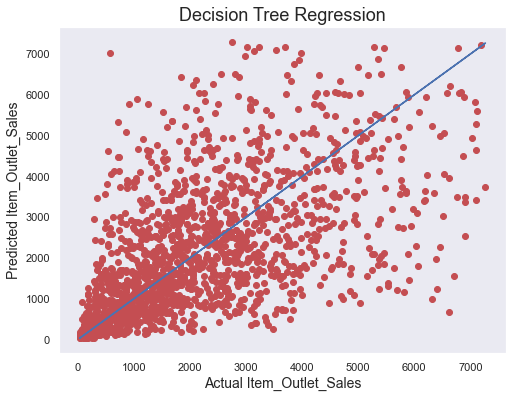

In [194]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [174]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 50}


In [175]:
gbr= GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=50)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 59.36336082149663
Cross Val Score: 58.49216717267757
At cv:- 3
R2 Score: 59.36336082149663
Cross Val Score: 58.7078633770981
At cv:- 4
R2 Score: 59.36336082149663
Cross Val Score: 58.54055852217236
At cv:- 5
R2 Score: 59.36336082149663
Cross Val Score: 58.623590191538376
At cv:- 6
R2 Score: 59.36336082149663
Cross Val Score: 58.739285188075264
At cv:- 7
R2 Score: 59.36336082149663
Cross Val Score: 58.83742168974726
At cv:- 8
R2 Score: 59.36336082149663
Cross Val Score: 58.72934943323928
At cv:- 9
R2 Score: 59.36336082149663
Cross Val Score: 58.73999413150168


In [176]:
print("At cv:-",7)
print("Cross validation score is:-",58.72)
print("R2_score is :-",59.36)

At cv:- 7
Cross validation score is:- 58.72
R2_score is :- 59.36


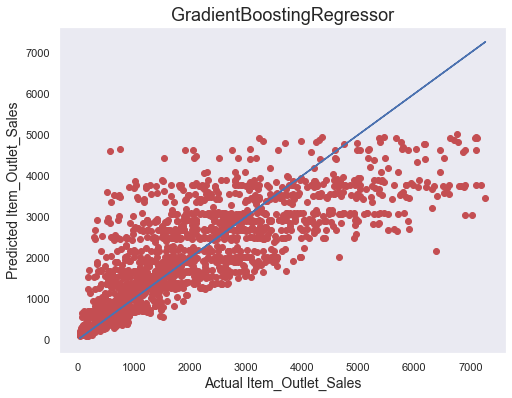

In [193]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gradient, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Support vector Regression

In [179]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'linear'}


In [180]:
sv = SVR(kernel = 'linear', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 47.81761812007513
Cross Val Score: 45.29306500616748
At cv:- 3
R2 Score: 47.81761812007513
Cross Val Score: 46.818200882885854
At cv:- 4
R2 Score: 47.81761812007513
Cross Val Score: 47.13830902553842
At cv:- 5
R2 Score: 47.81761812007513
Cross Val Score: 47.496631570156765
At cv:- 6
R2 Score: 47.81761812007513
Cross Val Score: 47.57067817542332
At cv:- 7
R2 Score: 47.81761812007513
Cross Val Score: 47.73101575881118
At cv:- 8
R2 Score: 47.81761812007513
Cross Val Score: 47.765053287228966
At cv:- 9
R2 Score: 47.81761812007513
Cross Val Score: 47.802365268928924


In [182]:
print("At cv:-",9)
print("Cross validation score is:-",47.80)
print("R2_score is :-",47.81)

At cv:- 9
Cross validation score is:- 47.8
R2_score is :- 47.81


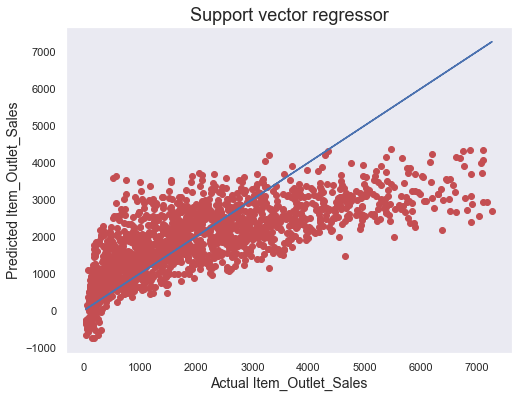

In [192]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [184]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'distance'}


In [187]:
kn = KNeighborsRegressor(algorithm = 'auto', weights = 'distance',n_neighbors=25)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 55.313132924340714
Cross Val Score: 1.0666302989703338
At cv:- 3
R2 Score: 55.313132924340714
Cross Val Score: 1.0893056382779884
At cv:- 4
R2 Score: 55.313132924340714
Cross Val Score: 1.0913109725711942
At cv:- 5
R2 Score: 55.313132924340714
Cross Val Score: 1.0865904035119336
At cv:- 6
R2 Score: 55.313132924340714
Cross Val Score: 1.0985787926327708
At cv:- 7
R2 Score: 55.313132924340714
Cross Val Score: 1.1002806079695595
At cv:- 8
R2 Score: 55.313132924340714
Cross Val Score: 1.0980205885767154
At cv:- 9
R2 Score: 55.313132924340714
Cross Val Score: 1.0986660891320263


In [188]:
print("At cv:-",9)
print("Cross validation score is:-",1.0)
print("R2_score is :-",55.31)

At cv:- 9
Cross validation score is:- 1.0
R2_score is :- 55.31


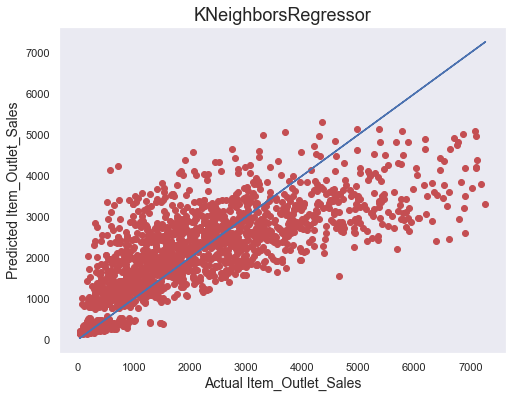

In [191]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()


# We tested 6 models out of which Gradient Boosting Regressor performing Best as Accuracy score and CV is Optimum.
Conclusion

In [198]:
import numpy as np
a=np.array(ytest)
a

array([3558.0352,  397.4826, 1662.5026, ...,  703.0848,  305.6022,
       2247.075 ])

In [199]:
predicted=np.array(pred_gradient)
predicted

array([1788.50803408,  324.76055951, 2487.19808837, ..., 1387.01234993,
        674.85279953, 2501.72601834])

In [200]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [201]:
df_com

,original,predicted
0,3558.0352,1788.508034
1,397.4826,324.760560
2,1662.5026,2487.198088
3,2681.8424,2174.060533
4,3169.2080,3529.900004
...,...,...
1663,885.5140,1260.363192
1664,1567.2932,1943.988064
1665,703.0848,1387.012350
1666,305.6022,674.852800


In [202]:
df_com.head(10)

,original,predicted
0,3558.0352,1788.508034
1,397.4826,324.760560
2,1662.5026,2487.198088
3,2681.8424,2174.060533
4,3169.2080,3529.900004
5,713.7376,712.757988
6,1813.6392,2485.488652
7,3735.1380,3992.605294
8,1102.5648,1376.729494
9,1105.8938,1651.529054


# The best model is Gradient Boosting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

In [204]:
print("At cv:-",7)
print("Cross validation score is:-",58.72)
print("R2_score is :-",59.36)

At cv:- 7
Cross validation score is:- 58.72
R2_score is :- 59.36


# Our Model performs with Accuracy 60%

Saving the best models with initials...using pickle library

In [ ]:
import pickle
filename = 'big_mart_sales_prediction.pkl'
pickle.dump(gbr, open(filename, 'wb'))